## Autoencoder for the MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt

2024-08-07 14:30:54.765273: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-07 14:30:54.779881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 14:30:54.796906: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 14:30:54.802180: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 14:30:54.815106: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# loading the MNIST and Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()

(60000, 28, 28)
(60000,)


In [3]:
# Normalizing the values
# MNIST
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255
print(X_test.shape)
# Fashion-MNIST
Xtrain = xtrain.astype('float32') / 255

(10000, 28, 28)


In [4]:
encoder = Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(2, activation="relu")
])

decoder = Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=[2]),
    keras.layers.Dense(100, activation="relu", input_shape=[50]),
    keras.layers.Dense(28*28, activation="relu", input_shape=[100]),
    keras.layers.Reshape([28,28])
])

model = Sequential([encoder, decoder], name="Autoencoder")
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["accuracy"])
model.summary()

/home/yatingyang/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-08-07 14:30:59.350393: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/yatingyang/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 2)              │        83,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │        84,434 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,086 (656.59 KB)

 Trainable params: 168,086 (656.59 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Training the Autoencoder
autoencoder = model.fit(X_train, X_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2762 - loss: 0.0685
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3652 - loss: 0.0519
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3924 - loss: 0.0472
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4010 - loss: 0.0459
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4055 - loss: 0.0447
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4095 - loss: 0.0438
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4142 - loss: 0.0430
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4174 - loss: 0.0426
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4187 - loss: 0.0420
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4199 - loss: 0.0414
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4217 - loss: 0.0412
Epoch 12/20
1875/1875 ━━━━━━━━

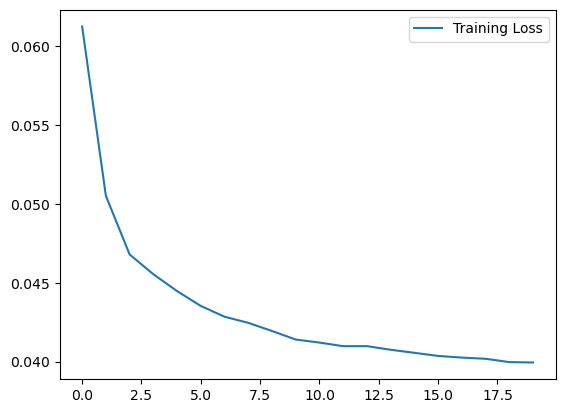

In [6]:
plt.plot(autoencoder.history["loss"], label="Training Loss")
#plt.plot(autoencoder.history["accuracy"], label="Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


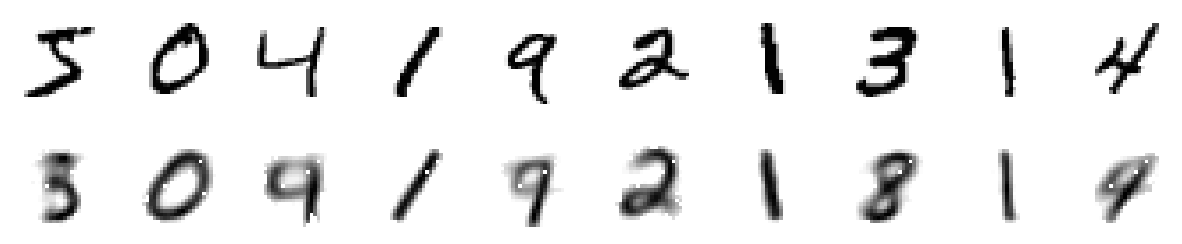

In [7]:
# visualize reconstructions of the MNIST dataset
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def reconstructions(model, n_images=10):
    reconstructions = model.predict(X_train[:n_images])
    fig = plt.figure(figsize=(n_images*1.5, 3))
    
    for i in range(n_images):
        plt.subplot(2, n_images, 1+i)
        plot_image(X_train[i])
        plt.subplot(2, n_images, 1+n_images+i)
        plot_image(reconstructions[i])

reconstructions(model)

In [8]:
# PCA
pca = PCA(n_components=150)
X_train_reshape = X_train.reshape(-1,28*28)
encoded = pca.fit_transform(X_train_reshape)
decoded = pca.inverse_transform(encoded)

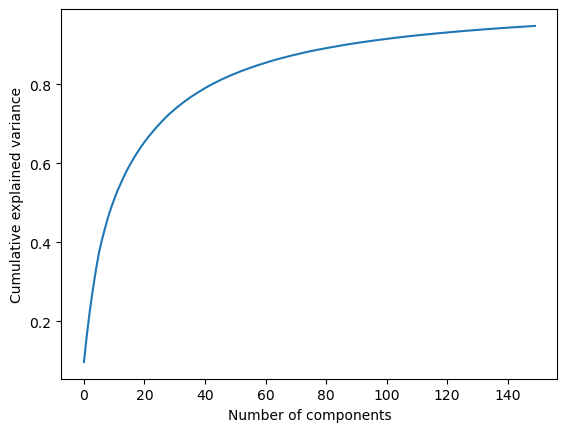

In [9]:
# number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

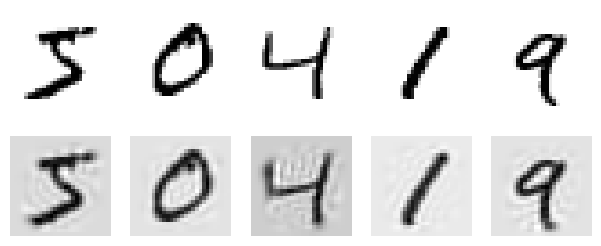

In [10]:
def reconstructions_pca(model, encoded, n_images=5):
    reconstructions = model.inverse_transform(encoded).reshape(-1,28,28)
    fig = plt.figure(figsize=(n_images*1.5, 3))
    for i in range(n_images):
        plt.subplot(2, n_images, 1+i)
        plot_image(X_train[i])
        plt.subplot(2, n_images, 1+n_images+i)
        plot_image(reconstructions[i])

reconstructions_pca(pca, encoded)

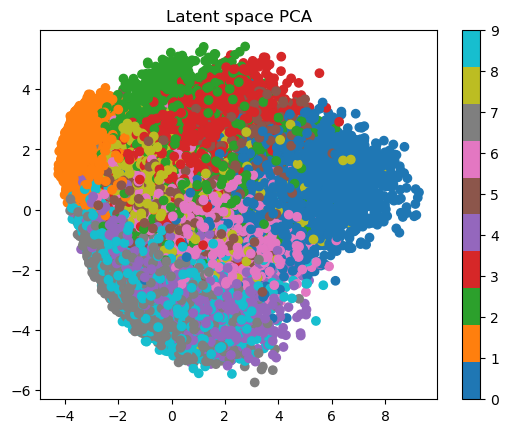

In [11]:
# Scatterplot of the latent embeddings
# PCA in 2 dimensions
pca_2 = PCA(n_components=2)
encoded_2 = pca_2.fit_transform(X_train_reshape)
decoded_2 = pca_2.inverse_transform(encoded_2)  # needed later for measuring the reconstruction error
visualize_2d = pca_2.fit_transform(encoded)
plt.title("Latent space PCA")
plt.scatter(visualize_2d[:,0], visualize_2d[:,1], c=y_train, cmap='tab10')
plt.colorbar()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


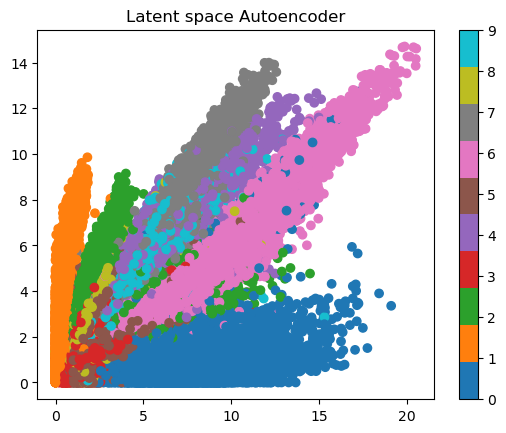

In [12]:
# Autoencoder
latent = encoder.predict(X_train)
plt.scatter(latent[:,0], latent[:,1], c=y_train, cmap="tab10")
plt.title("Latent space Autoencoder")
plt.colorbar()

In [13]:
# Reconstruction error for the MNIST testing data
# Autoencoder
pred_ae = decoder(encoder.predict(X_test, batch_size=1)).numpy()
pred_ae = pred_ae.reshape(-1,28*28)
true = X_test.reshape(-1,28*28)
rmse_ae = sqrt(mean_squared_error(true, pred_ae))
print("RMSE Autoencoder:", rmse_ae)

# PCA
X_test_reshape = X_test.reshape(-1,28*28)
encoded_2_test = pca_2.fit_transform(X_test_reshape)
decoded_2_test = pca_2.inverse_transform(encoded_2_test)

pred_pca = decoded_2_test
rmse_pca = sqrt(mean_squared_error(true, pred_pca))
print("RMSE PCA:", rmse_pca)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 570us/step
RMSE Autoencoder: 0.20035491721888077
RMSE PCA: 0.2356901700863234


In [14]:
rmse_ae_mnist = []
rmse_pca_mnist = []

for i in range(len(true)):
    rmse_ae_mnist.append(sqrt(mean_squared_error(true[i], pred_ae[i])))
    rmse_pca_mnist.append(sqrt(mean_squared_error(true[i], pred_pca[i])))

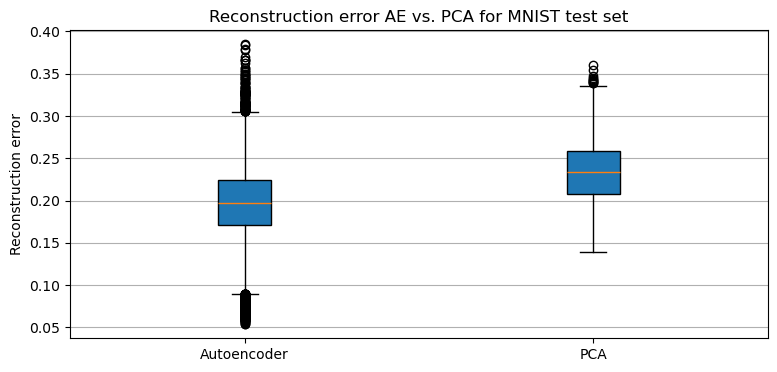

In [15]:
# Histogram and box plot of the reconstruction error for the Fashion-MNIST dataset

labels = ["Autoencoder", "PCA"]
fig, ax1 = plt.subplots(figsize=(9, 4))
data = [rmse_ae_mnist, rmse_pca_mnist]


# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True, 
                     patch_artist=True, 
                     labels=labels)  
ax1.set_title('Reconstruction error AE vs. PCA for MNIST test set')

ax1.yaxis.grid(True)
ax1.set_ylabel('Reconstruction error')

plt.show()

In [16]:
# Reconstruction error for the test data (fashion-mnist)
# Autoencoder
pred_ae_test = decoder(encoder.predict(Xtrain)).numpy()
pred_ae_test = pred_ae_test.reshape(-1,28*28)
#true_test = X_test.reshape(-1,28*28) # mnist
true_test = Xtrain.reshape(-1,28*28) # fashion-mnist
rmse_ae_test = sqrt(mean_squared_error(true_test, pred_ae_test))
print("RMSE Autoencoder:", rmse_ae_test)

# PCA
pca_test = PCA(n_components=2)
X_test_reshape = Xtrain.reshape(-1,28*28)
encoded_test = pca.fit_transform(X_test_reshape)
decoded_test = pca.inverse_transform(encoded_test)

pred_pca_test = decoded_test 
rmse_pca_test = sqrt(mean_squared_error(true_test, pred_pca_test))
print("RMSE PCA:", rmse_pca)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
RMSE Autoencoder: 0.36885659325932724
RMSE PCA: 0.2356901700863234


In [17]:
rmse_ae = []
rmse_pca = []

for i in range(len(true_test)):
    rmse_ae.append(sqrt(mean_squared_error(true_test[i], pred_ae_test[i])))
    rmse_pca.append(sqrt(mean_squared_error(true_test[i], pred_pca_test[i])))

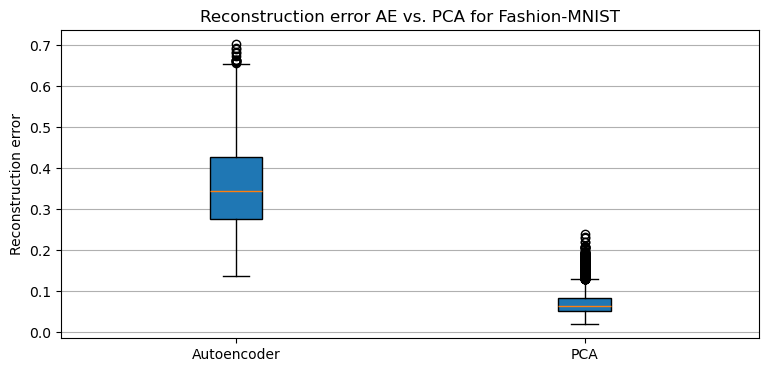

In [18]:
# Histogram of the reconstruction error for the Fashion-MNIST dataset

labels = ["Autoencoder", "PCA"]
fig, ax1 = plt.subplots(figsize=(9, 4))
data = [rmse_ae, rmse_pca]

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True, 
                     patch_artist=True, 
                     labels=labels)  
ax1.set_title('Reconstruction error AE vs. PCA for Fashion-MNIST')

ax1.yaxis.grid(True)
ax1.set_ylabel('Reconstruction error')

plt.show()